In [22]:
import numpy as np

In [23]:
import matplotlib.pyplot as plt

In [24]:
BAC_nodes = np.array([0, 0.03, 0.07, 0.15, 0.21, 0.27])

In [25]:
risk_values = np.array([1, 1.06, 2.09, 22.1, 99.78, 328.602])

In [66]:
def create_matrix(nodes):
    matrix = []

    for node in nodes:
        current_row = []

        for i in range(len(nodes)):
            current_row.append(np.e ** (i*node))
        matrix.append(current_row)

    return np.array(matrix)

In [67]:
A = create_matrix(BAC_nodes)

In [68]:
print(A)

[[1.         1.         1.         1.         1.         1.        ]
 [1.         1.03045453 1.06183655 1.09417428 1.12749685 1.16183424]
 [1.         1.07250818 1.1502738  1.23367806 1.32312981 1.41906755]
 [1.         1.16183424 1.34985881 1.56831219 1.8221188  2.11700002]
 [1.         1.23367806 1.52196156 1.87761058 2.31636698 2.85765112]
 [1.         1.30996445 1.71600686 2.24790799 2.94467955 3.85742553]]


In [69]:
coeffs = np.linalg.solve(A, risk_values)

In [70]:
print(coeffs)

[ 5.38042614e+04 -2.09024759e+05  3.04729868e+05 -1.97591583e+05
  4.80844797e+04 -1.26674627e+00]


In [80]:
def calc_poly_value(poly_coeffs, x):
    res = 0
    for i in range(len(poly_coeffs)):
        res += poly_coeffs[i] * np.exp(i * x)
    return res

In [81]:
x_axis = np.linspace(0, 0.27, 100)

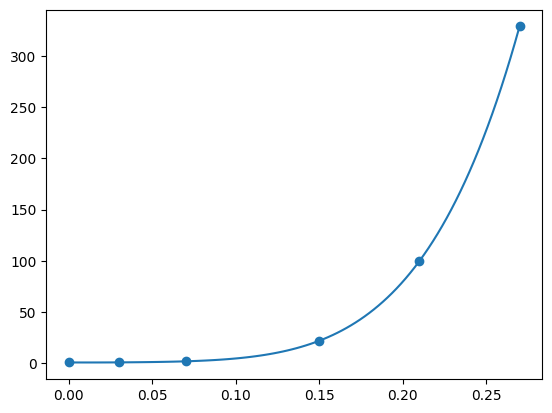

In [89]:
plt.plot(x_axis, calc_poly_value(coeffs,x_axis))
plt.scatter(BAC_nodes, risk_values)
plt.show()